In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from experiment_utils import *



In [18]:
def metric_has_substring(metric, substrings):
    for sub in substrings:
        if sub in metric:
            return True
    return False

In [19]:
results_filename = "hyperparams_sex"

results_file = os.path.join("results",results_filename +".csv")
reader = ResultsReader(results_file)

all_metrics = reader.metrics
metrics_to_use = ["SF"]
metrics_to_display = [m for m in all_metrics if metric_has_substring(m, metrics_to_use)] +[OtherColReader.ACC_SF_TO]

for col in ResultsReader.FILTERABLE:
    print(reader.get_all_column_values(col))
    
#ffvae_reader.clear_filters()


grapher = ResultsGrapher(reader)
grapher.show_legend = False
#grapher.plot_metrics_vs_metric(mean=True, relative=True, metrics = metrics_to_display)

reader.clear_filters()



File 'results\hyperparams_sex.csv' successfully loaded as DataFrame.
['German Dataset', 'Adult Dataset', 'Compas Dataset']
['LogisticRegression', 'MLPClassifier']
["['sex']"]
['Reweighing Bias Mitigation', 'FairBalance Bias Mitigation', 'FairMask Bias Mitigation', 'No Bias Mitigation', 'FYP VAE']
['{}', '{\'c\': \'FYP\', \'my model config\': "VAEMaskConfig(epochs=1542, latent_dim=20, mask_values=None vae_layers=(75, 60, 30, 20), lr=0.015960000000000002, \\nlosses_used=[\'Flipped ADV loss\', \'Pos Y vec loss\', \'Reconstruction loss\', \'KL divergence loss\'])Flipped ADV loss: {\'weight\': 0.0077, \'lr\': 0.06, \'optimizer\': \'Adam\', \'layers\': (60, 10, 10, 10), \'input_dim\': 26, \'sens_col_ids\': [23]}, Pos Y vec loss: {\'weight\': 1512000.0}, Reconstruction loss: {\'weight\': 13.35}, KL divergence loss: {\'weight\': 0.00285}"}', '{\'c\': \'FYP\', \'my model config\': "VAEMaskConfig(epochs=1512, latent_dim=17, mask_values=None vae_layers=(100, 100, 30), lr=0.01904, \\nlosses_used=[

In [20]:
reader.clear_filters()
reader.set_filter(reader.DATASET, ["Adult Dataset"])
#reader.set_filter(reader.OTHER, ["Latent sens ADV loss', 'Pos Y vec loss"])
df = reader.get_mean_relative_metrics()
for o in df["other"]:
    #print(o)
    pass
    
#df

File 'results\2recon_loss_race.csv' successfully loaded as DataFrame.
['Adult Dataset', 'Compas Dataset']
['MLPClassifier']
["['race']"]
['FairMask Bias Mitigation', 'No Bias Mitigation', 'EqOdds ALT', 'EqOdds', 'FYP VAE']
['{}', "{'c': 'EqO ALT2'}", "{'c': 'EqO2'}", '{\'c\': \'mse2\', \'my model config\': "VAEMaskConfig(epochs=1400, latent_dim=30, mask_values=None vae_layers=(75, 60, 30, 30), lr=0.014, \\nlosses_used=[\'Latent sens ADV loss\', \'Pos Y vec loss\', \'Flipped ADV loss\', \'KL divergence loss\'])Latent sens ADV loss: {\'weight\': 0.1, \'lr\': 0.05, \'optimizer\': \'Adam\', \'layers\': (30, 30), \'input_dim\': 29}, Pos Y vec loss: {\'weight\': 1200000}, Flipped ADV loss: {\'weight\': 17, \'lr\': 0.05, \'optimizer\': \'Adam\', \'layers\': (50, 30, 10), \'input_dim\': 25, \'sens_col_ids\': [23]}, KL divergence loss: {\'weight\': 0.005}, Reconstruction loss: {\'weight\': 17}"}', '{\'c\': \'FYP\', \'my model config\': "VAEMaskConfig(epochs=1400, latent_dim=30, mask_values=None

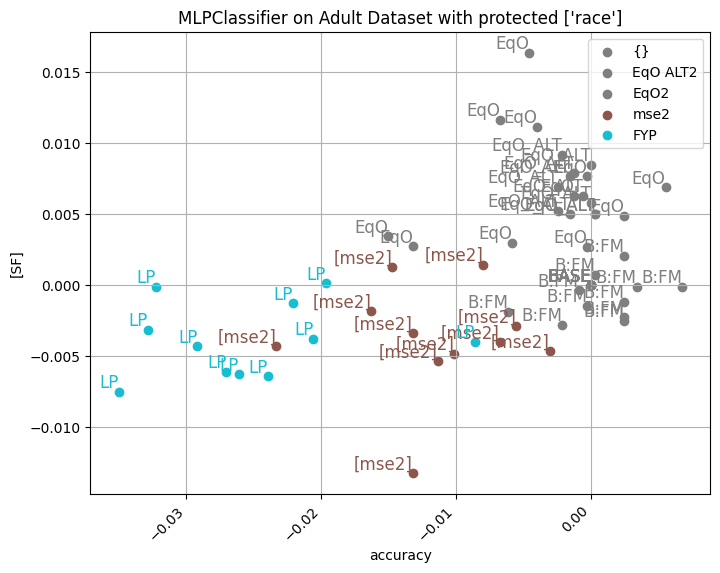

____________________________________________________________________________________________________
Compas Dataset , MLPClassifier ['race']


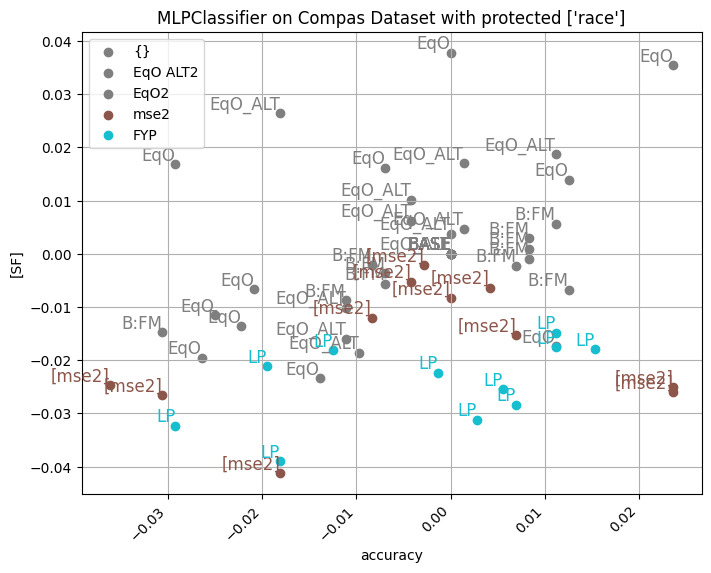

In [25]:
results_filename = "2recon_loss_race"
#results_filename = "recon_loss_race"

results_file = os.path.join("results",results_filename +".csv")
reader = ResultsReader(results_file)

all_metrics = reader.metrics
metrics_to_use = ["SF"]
metrics_to_display = [m for m in all_metrics if metric_has_substring(m, metrics_to_use)] #+[OtherColReader.ACC_SF_TO]

for col in ResultsReader.FILTERABLE:
    print(reader.get_all_column_values(col))
    
print(reader.columns_shown)

def f(df):
    loss_a =  (df["other"].str.contains("Latent sens ADV loss"))  # (df["other"].str.contains("Sensitive KL loss")) 
    loss = loss_a | (df["other"].str.contains("Sensitive KL loss")) 
    general_mask = (df["data"].str.contains('German')) & (df["ML method"].str.contains('MLP'))
    performance_mask =  loss & (df["accuracy"]> -0.01 ) &(df["[SF] Statistical Parity Subgroup Fairness"]< -0.013 ) 
    return df#[general_mask & ( performance_mask  | ~(df["other"].str.contains('FYP')) )]
reader.relative_metrics_filter = f

grapher = ResultsGrapher(reader)
#grapher.show_legend = False
grapher.plot_metrics_vs_metric(mean=False, relative=True, metrics = metrics_to_display)

reader.clear_filters()


relative= reader.get_relative_metrics()

for r in relative['other']:
    #print(r)
    pass
    
#relative


File 'results\methodic_hyperparams_sex.csv' successfully loaded as DataFrame.
['German Dataset', 'Compas Dataset', 'Adult Dataset']
['MLPClassifier', 'LogisticRegression']
["['sex']"]
['FairMask Bias Mitigation', 'No Bias Mitigation', 'FYP VAE', 'Reweighing Bias Mitigation', 'FairBalance Bias Mitigation']
['{}', '{\'c\': \'FYP\', \'my model config\': "VAEMaskConfig(epochs=1400, latent_dim=15, mask_values=None vae_layers=(50, 45, 35, 30), lr=0.01, \\nlosses_used=[\'Latent sens ADV loss\', \'Pos Y vec loss\', \'Flipped ADV loss\', \'KL divergence loss\'])Latent sens ADV loss: {\'weight\': 0.1, \'lr\': 0.05, \'optimizer\': \'Adam\', \'layers\': (75, 30, 10), \'input_dim\': 14}, Pos Y vec loss: {\'weight\': 1200000}, Flipped ADV loss: {\'weight\': 0.01, \'lr\': 0.05, \'optimizer\': \'Adam\', \'layers\': (75, 30, 10), \'input_dim\': 26, \'sens_col_ids\': [23]}, KL divergence loss: {\'weight\': 0.005}, Reconstruction loss: {\'weight\': 15}, Sensitive KL loss: {\'weight\': 9000, \'sens_col_id

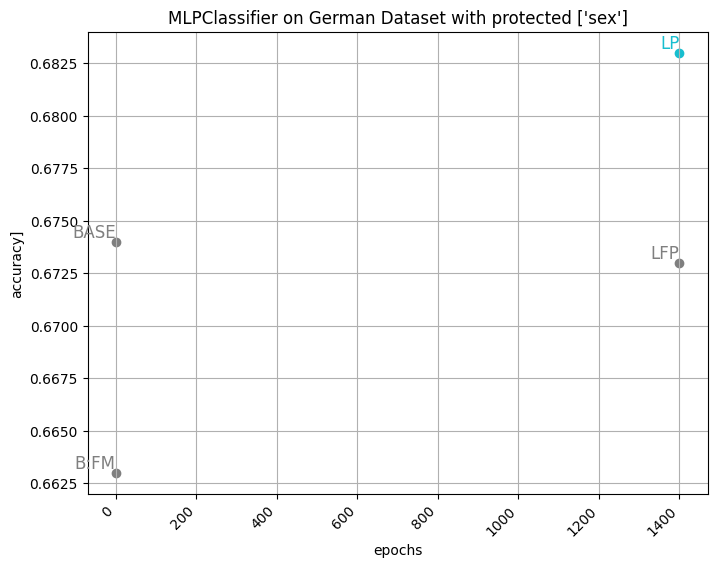

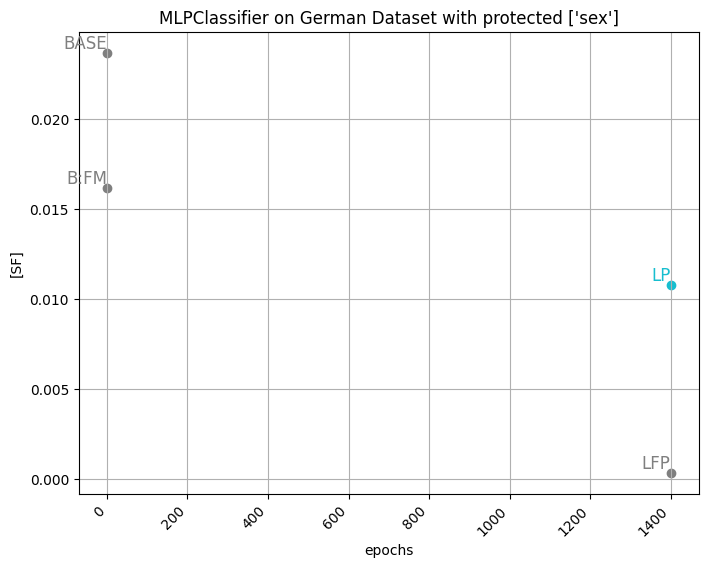

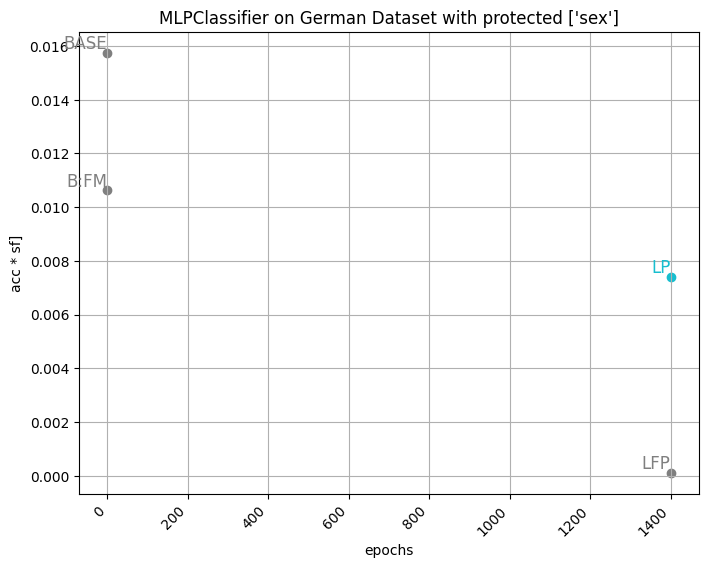

____________________________________________________________________________________________________
German Dataset , LogisticRegression ['sex']
no rows found
____________________________________________________________________________________________________
Compas Dataset , MLPClassifier ['sex']


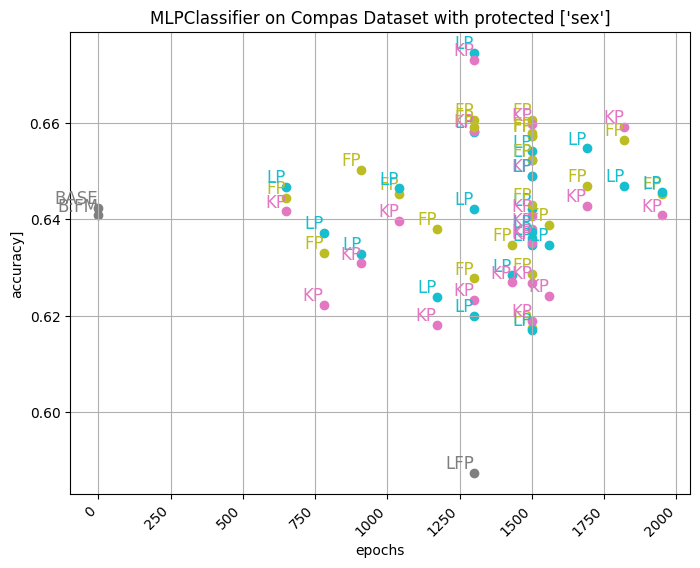

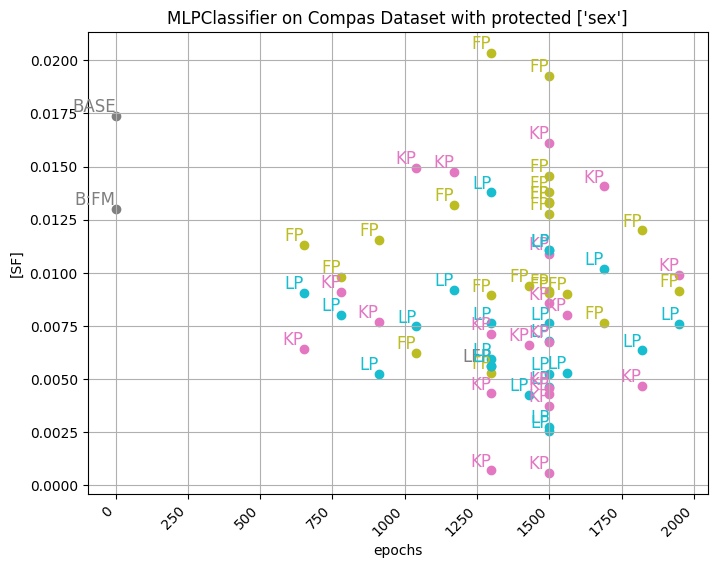

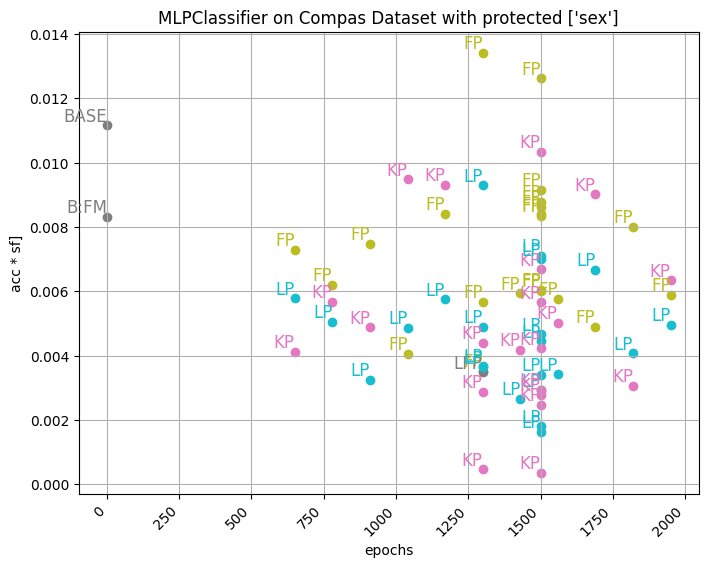

____________________________________________________________________________________________________
Compas Dataset , LogisticRegression ['sex']


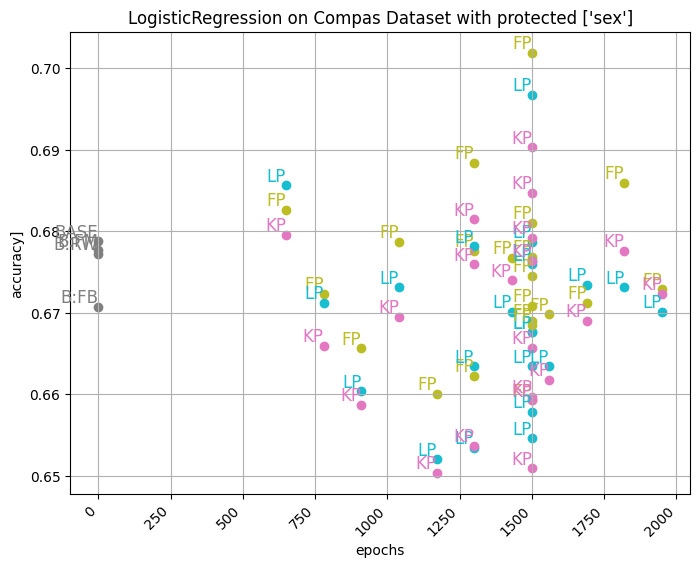

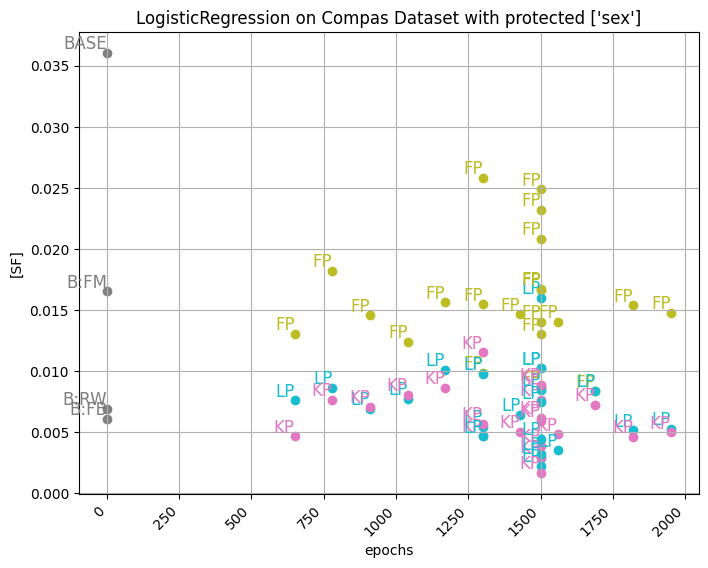

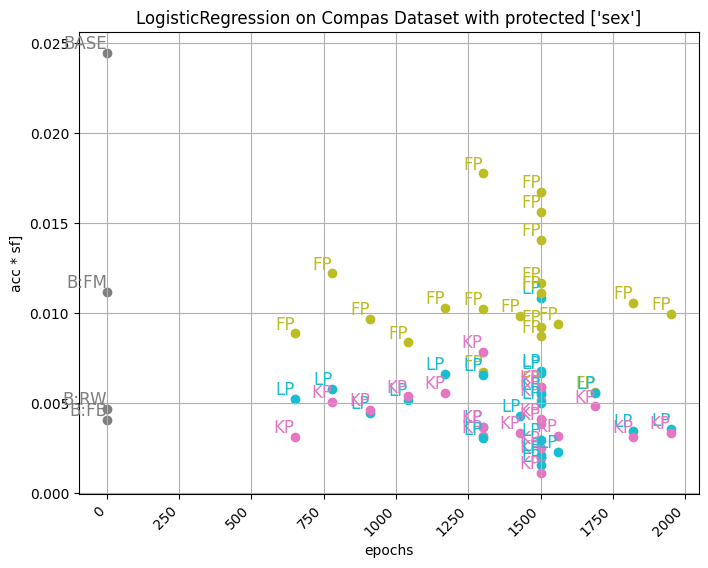

____________________________________________________________________________________________________
Adult Dataset , MLPClassifier ['sex']


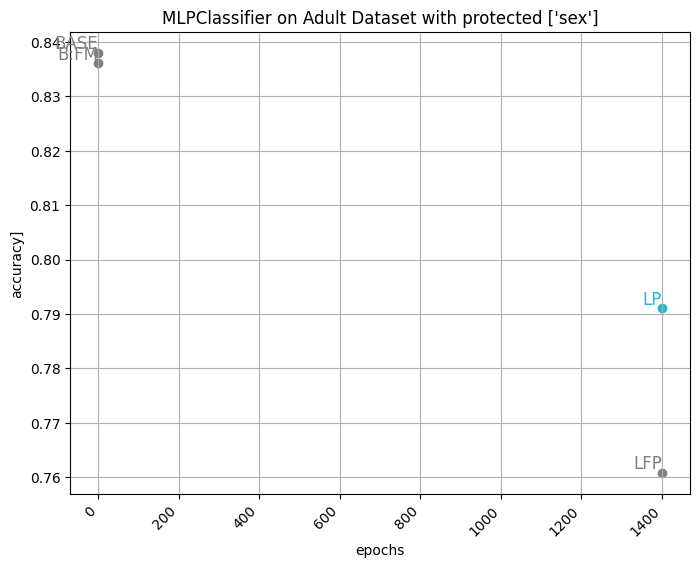

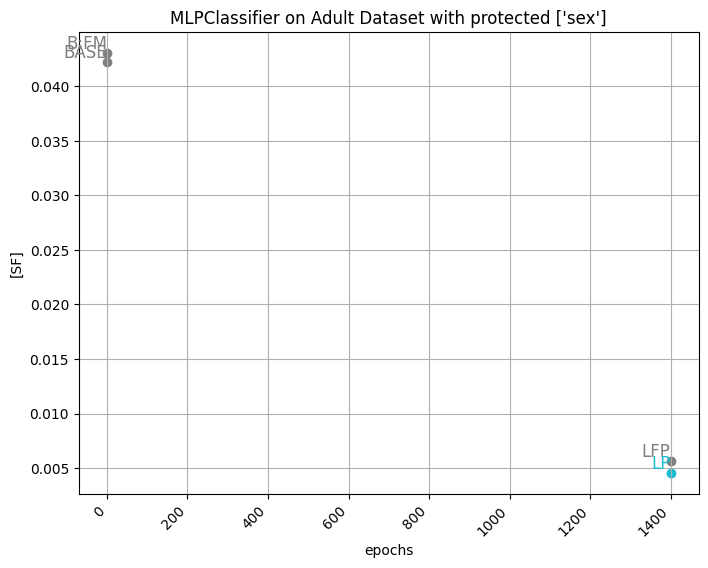

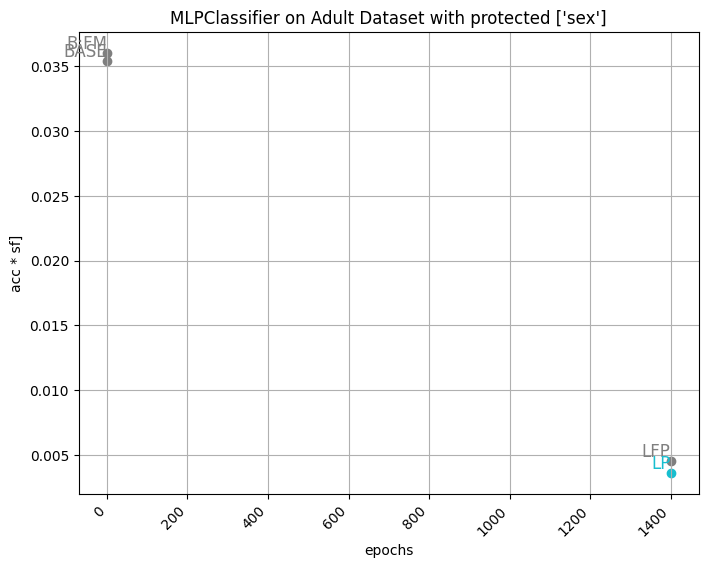

____________________________________________________________________________________________________
Adult Dataset , LogisticRegression ['sex']
no rows found
unable to find base for 112 index 0 is out of bounds for axis 0 with size 0
unable to find base for 401 index 0 is out of bounds for axis 0 with size 0


In [14]:
results_filename = "methodic_hyperparams_sex"

results_file = os.path.join("results",results_filename +".csv")
reader = ResultsReader(results_file)

all_metrics = reader.metrics
metrics_to_use = ["SF","acc"]
metrics_to_display = [m for m in all_metrics if metric_has_substring(m, metrics_to_use)] +[OtherColReader.ACC_SF_TO]

for col in ResultsReader.FILTERABLE:
    print(reader.get_all_column_values(col))
    
print(reader.columns_shown)

def f(df):
    loss_a =  (df["other"].str.contains("Latent sens ADV loss"))  # (df["other"].str.contains("Sensitive KL loss")) 
    loss = loss_a | (df["other"].str.contains("Sensitive KL loss")) 
    general_mask = (df["data"].str.contains('German')) & (df["ML method"].str.contains('MLP'))
    performance_mask =  loss & (df["accuracy"]> -0.01 ) &(df["[SF] Statistical Parity Subgroup Fairness"]< -0.013 ) 
    return df#[general_mask & ( performance_mask  | ~(df["other"].str.contains('FYP')) )]
reader.relative_metrics_filter = f

grapher = ResultsGrapher(reader)
grapher.show_legend = False
grapher.plot_metrics_vs_metric(mean=True, relative=False, metrics = metrics_to_display, metric=OtherColReader.EPOCHS)

reader.clear_filters()


relative= reader.get_relative_metrics()

for r in relative['other']:
    #print(r)
    pass
    
#relative


File 'results\hyperparams_race.csv' successfully loaded as DataFrame.
['Adult Dataset', 'Compas Dataset']
['MLPClassifier', 'LogisticRegression']
["['race']"]
['FairMask Bias Mitigation', 'No Bias Mitigation', 'FYP VAE', 'Reweighing Bias Mitigation', 'FairBalance Bias Mitigation']
['{}', '{\'c\': \'FYP\', \'my model config\': "VAEMaskConfig(epochs=1542, latent_dim=26, mask_values=None vae_layers=(100, 75, 50), lr=0.010780000000000001, \\nlosses_used=[\'Flipped ADV loss\', \'Pos Y vec loss\', \'Reconstruction loss\', \'KL divergence loss\'])Flipped ADV loss: {\'weight\': 0.01, \'lr\': 0.0235, \'optimizer\': \'Adam\', \'layers\': (60, 30), \'input_dim\': 34, \'sens_col_ids\': [32]}, Pos Y vec loss: {\'weight\': 1296000.0}, Reconstruction loss: {\'weight\': 21.45}, KL divergence loss: {\'weight\': 0.0042}"}', '{\'c\': \'FYP\', \'my model config\': "VAEMaskConfig(epochs=1055, latent_dim=32, mask_values=None vae_layers=(50, 45, 35, 30), lr=0.0084, \\nlosses_used=[\'Sensitive KL loss\', \'Po

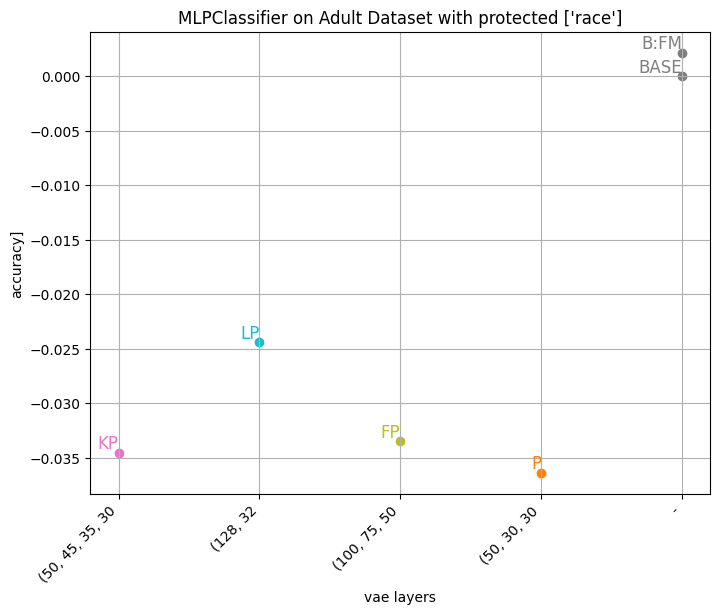

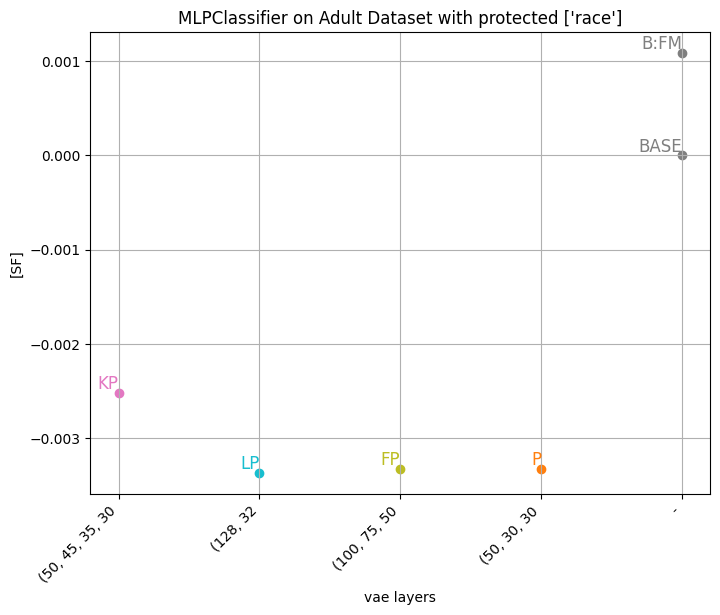

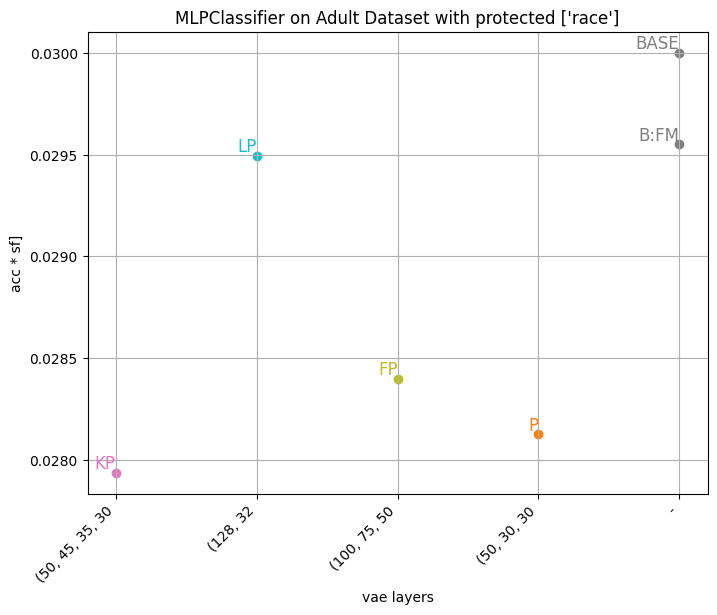

____________________________________________________________________________________________________
Adult Dataset , LogisticRegression ['race']
roww data                            Adult Dataset
ML method                  LogisticRegression
sensitive attrs                      ['race']
bias mitigation    Reweighing Bias Mitigation
other                                      {}
accuracy                             0.847406
id                                          4
Name: 0, dtype: object
base              data           ML method sensitive attrs     bias mitigation  \
23  Adult Dataset  LogisticRegression        ['race']  No Bias Mitigation   

   other  accuracy  id  
23    {}  0.850476   4  
roww data                             Adult Dataset
ML method                   LogisticRegression
sensitive attrs                       ['race']
bias mitigation    FairBalance Bias Mitigation
other                                       {}
accuracy                              0.805035
id      

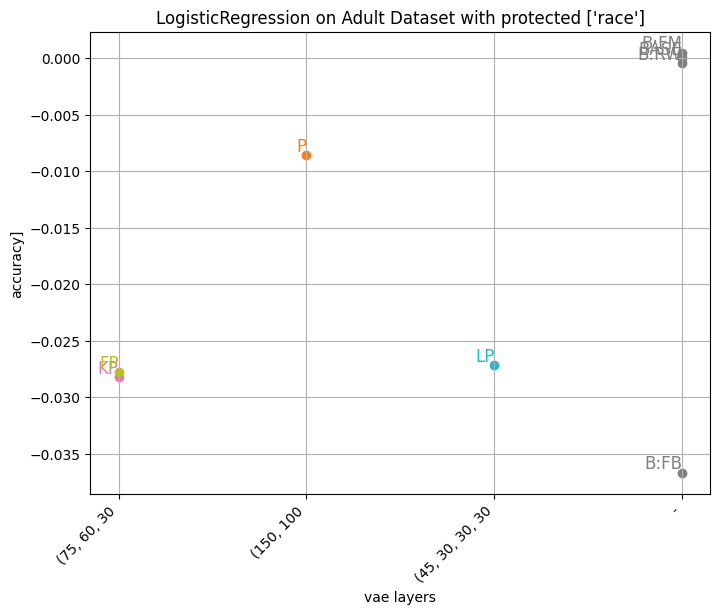

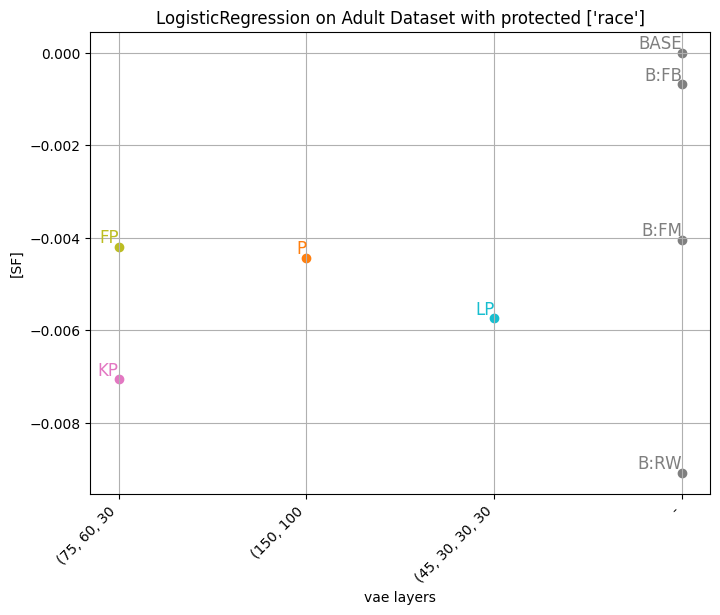

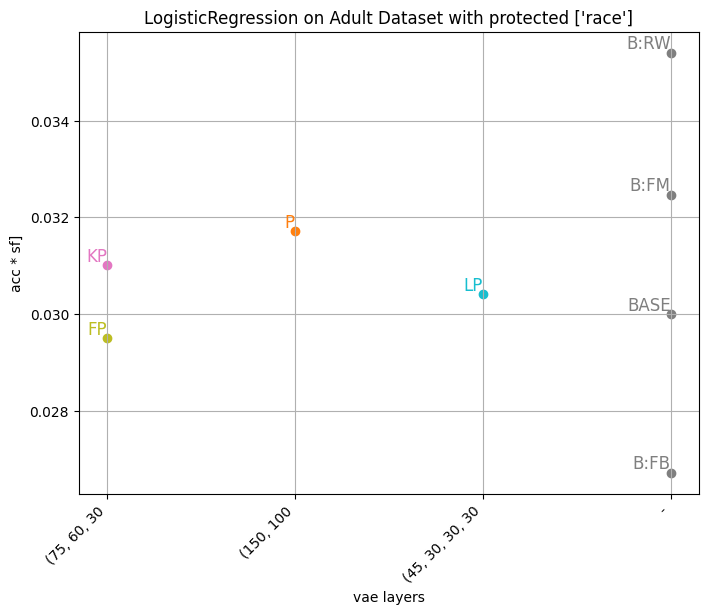

____________________________________________________________________________________________________
Compas Dataset , MLPClassifier ['race']
roww data                         Compas Dataset
ML method                     MLPClassifier
sensitive attrs                    ['race']
bias mitigation    FairMask Bias Mitigation
other                                    {}
accuracy                           0.632823
id                                        9
Name: 0, dtype: object
base               data      ML method sensitive attrs     bias mitigation other  \
57  Compas Dataset  MLPClassifier        ['race']  No Bias Mitigation    {}   

    accuracy  id  
57  0.634214   9  
roww data                   Compas Dataset
ML method               MLPClassifier
sensitive attrs              ['race']
bias mitigation    No Bias Mitigation
other                              {}
accuracy                     0.634214
id                                  9
Name: 1, dtype: object
base               data    

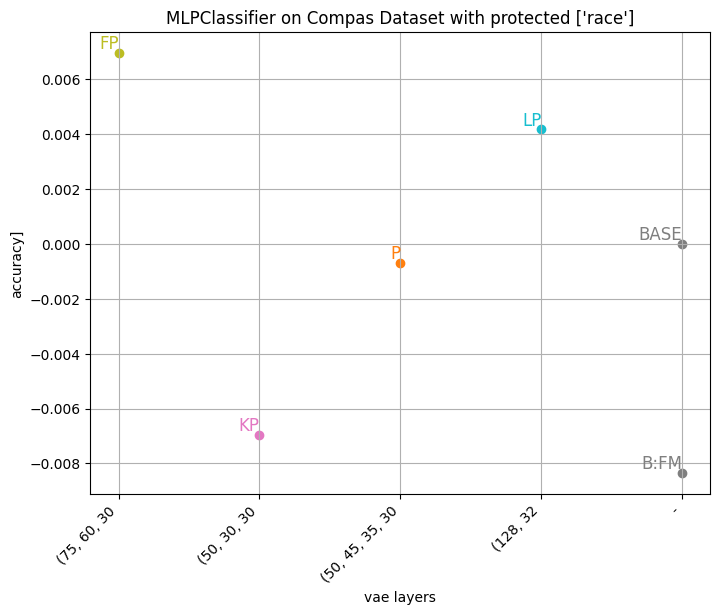

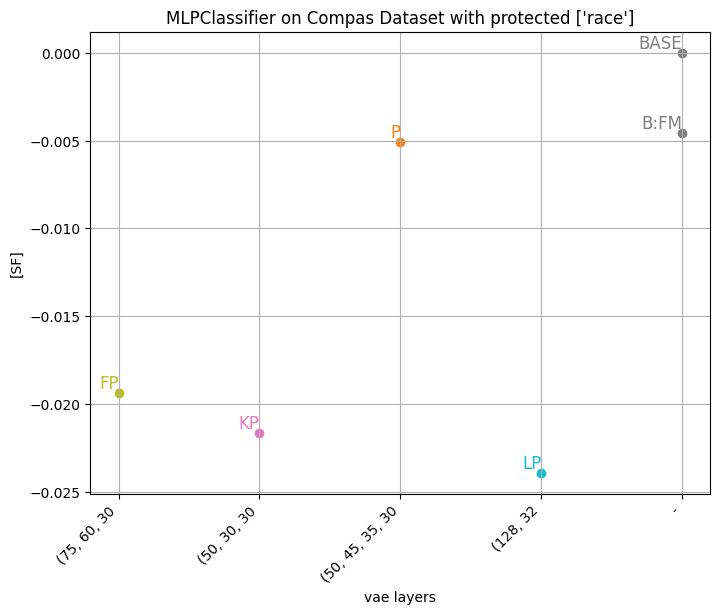

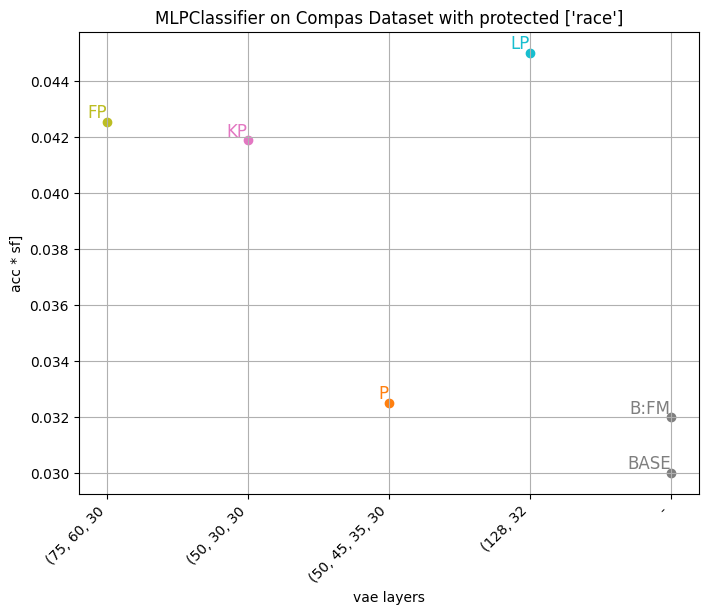

____________________________________________________________________________________________________
Compas Dataset , LogisticRegression ['race']
roww data                           Compas Dataset
ML method                  LogisticRegression
sensitive attrs                      ['race']
bias mitigation    Reweighing Bias Mitigation
other                                      {}
accuracy                             0.663421
id                                         90
Name: 0, dtype: object
base               data           ML method sensitive attrs     bias mitigation  \
65  Compas Dataset  LogisticRegression        ['race']  No Bias Mitigation   

   other  accuracy  id  
65    {}  0.657858  90  
roww data                            Compas Dataset
ML method                   LogisticRegression
sensitive attrs                       ['race']
bias mitigation    FairBalance Bias Mitigation
other                                       {}
accuracy                              0.659249
id   

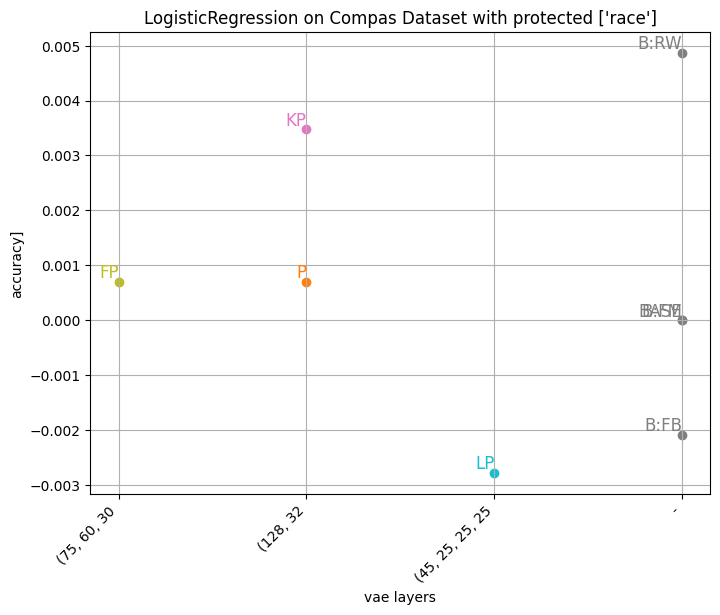

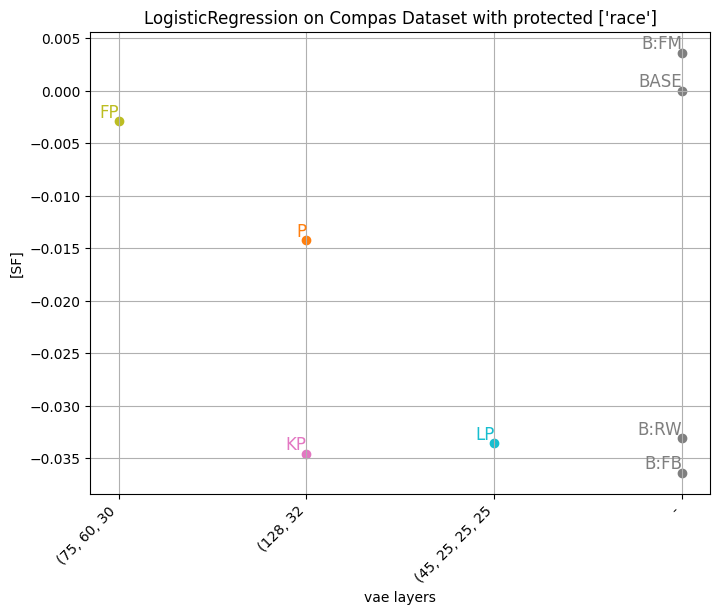

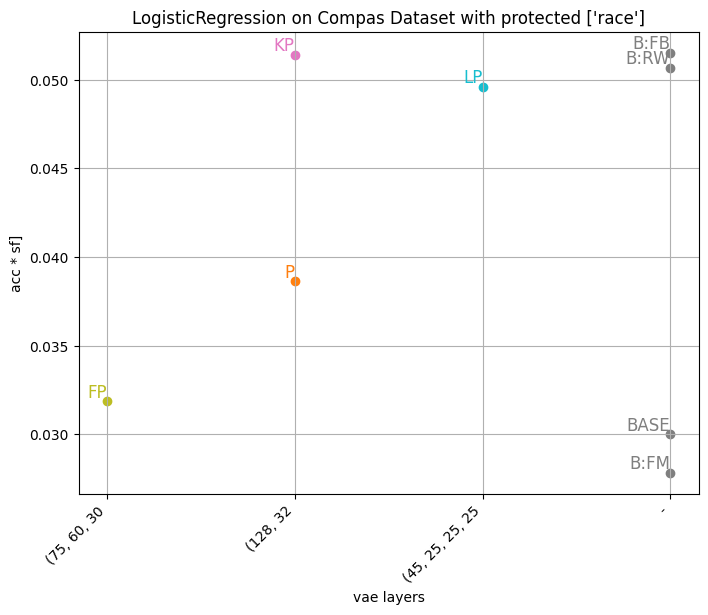

roww data                          Adult Dataset
ML method                     MLPClassifier
sensitive attrs                    ['race']
bias mitigation    FairMask Bias Mitigation
other                                    {}
accuracy                           0.837581
id                                        3
Name: 0, dtype: object
base              data      ML method sensitive attrs     bias mitigation other  \
15  Adult Dataset  MLPClassifier        ['race']  No Bias Mitigation    {}   

    accuracy  id  
15   0.83666   3  
roww data                    Adult Dataset
ML method               MLPClassifier
sensitive attrs              ['race']
bias mitigation    No Bias Mitigation
other                              {}
accuracy                      0.83666
id                                  3
Name: 1, dtype: object
base              data      ML method sensitive attrs     bias mitigation other  \
15  Adult Dataset  MLPClassifier        ['race']  No Bias Mitigation    {}   

    accu

,index,data,bias mitigation,ML method,sensitive attrs,other,accuracy,precision,recall,race|[AOD] Average Odds Difference,race|[EOD] Equal Opportunity Difference,race|[SPD] Statistical Parity Difference,race|[DI_FM] Disparate Impact the way it was implemented in FairMask,[SF] Statistical Parity Subgroup Fairness,id,vae layers,acc * sf
0,14,Adult Dataset,FairMask Bias Mitigation,MLPClassifier,['race'],{},0.000921,0.001841,0.002625,0.053739,0.118297,0.009088,-0.102362,-0.001181,3,-,0.030803
1,15,Adult Dataset,No Bias Mitigation,MLPClassifier,['race'],{},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,-,0.030000
2,16,Adult Dataset,FYP VAE,MLPClassifier,['race'],"{'c': 'FYP', 'my model config': ""VAEMaskConfig...",-0.038993,-0.044280,-0.263780,0.058728,0.109927,0.047766,-0.165475,-0.006207,3,"(100, 75, 50",0.029341
3,17,Adult Dataset,FYP VAE,MLPClassifier,['race'],"{'c': 'FYP', 'my model config': ""VAEMaskConfig...",-0.029475,-0.054890,-0.114173,0.102561,0.186870,0.056644,-0.458113,-0.007361,3,"(50, 45, 35, 30",0.031035
4,18,Adult Dataset,FYP VAE,MLPClassifier,['race'],"{'c': 'FYP', 'my model config': ""VAEMaskConfig...",-0.035002,-0.026149,-0.263780,0.037733,0.064477,0.043031,-0.057702,-0.005592,3,"(50, 30, 30",0.029463
5,19,Adult Dataset,FYP VAE,MLPClassifier,['race'],"{'c': 'FYP', 'my model config': ""VAEMaskConfig...",-0.008597,0.022390,-0.128609,0.078153,0.142235,0.044397,-0.275384,-0.005769,3,"(128, 32",0.032503
6,20,Adult Dataset,Reweighing Bias Mitigation,LogisticRegression,['race'],{},-0.003070,-0.007174,-0.007874,0.109316,0.175358,0.064519,-0.719829,-0.008384,4,-,0.034672
7,21,Adult Dataset,FairBalance Bias Mitigation,LogisticRegression,['race'],{},-0.045441,-0.159134,0.227034,0.046456,0.112512,-0.009065,-0.515283,0.001178,4,-,0.024856
8,22,Adult Dataset,FairMask Bias Mitigation,LogisticRegression,['race'],{},0.000307,-0.003524,0.009186,0.054971,0.095890,0.026000,-0.381210,-0.003379,4,-,0.032060
9,23,Adult Dataset,No Bias Mitigation,LogisticRegression,['race'],{},0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,-,0.030000


In [ ]:
results_filename = "hyperparams_race"

results_file = os.path.join("results",results_filename +".csv")
reader = ResultsReader(results_file)

all_metrics = reader.metrics
metrics_to_use = ["SF","acc"]
metrics_to_display = [m for m in all_metrics if metric_has_substring(m, metrics_to_use)] +[OtherColReader.ACC_SF_TO]

for col in ResultsReader.FILTERABLE:
    print(reader.get_all_column_values(col))
    
print(reader.columns_shown)

def f(df):
    mask = (df["accuracy"]> -0.02 ) &(df["[SF] Statistical Parity Subgroup Fairness"]< -0.02 ) |  ~(df["other"].str.contains('FYP')) 
    return df#[mask]
reader.relative_metrics_filter = f

grapher = ResultsGrapher(reader)
grapher.show_legend = False
grapher.plot_metrics_vs_metric(mean=True, relative=True, metrics = metrics_to_display, metric=OtherColReader.VAE_LAYERS)

reader.clear_filters()


relative= reader.get_relative_metrics()

for r in relative['other']:
    print(r)
    
relative
